<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Team Building - MM co</h1>
<br>
Author: Team 17<br>
Jesal Pancham<br>
Maria Fernanda Pernillo<br>
Mariana Salazar<br>
Tuty Chau<br>
<br>
<strong>DAT-5304 | Data Optimization</strong>
<br> Prof. Michael Rolleigh<br>
Hult International Business School<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Imports</h2>
<br>

In [3]:
# Importing necesary libraries
from pulp import *
from numpy import mean
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Importing file
file = "MM_EmployeeData.xlsx"

# setting pandas print options
pd.set_option('display.max_rows', 100)

# Instantiating the data set as an object
mm_data = pd.read_excel(io         = file,
                        sheet_name = "Data",
                        header     = 0)
# Showing the data
#mm_data

<br><h2>Exploratory data and parameters set up</h2>
<br>

In [4]:
# 2. Exploring data and setting up parameters (variables)

num_emp = mm_data['Gender'].count()                                           # Number of employees
female  = mm_data.loc[mm_data['Gender'] == 'Female','Gender'].count()         # Number of female employees
male    = mm_data.loc[mm_data['Gender'] == 'Male','Gender'].count()           # Number of male employees

female_ratio = female / num_emp # Ratio of female employees
male_ratio   = male / num_emp   # Ratio of male employees

def Average(team):
    return sum(team) / len(team)
avg_exp_pop = mm_data['Experience'].sum() / len(mm_data)  # Average years of experience of the population

dept = mm_data['Department'].nunique()  # Unique count of departments

nat = mm_data['Nationality'].nunique()  # Unique count of nationalities

<br><h2>Creating simulation for teams creation</h2>
<br>

In [5]:
# 3. Setting loops with the constraints / penalties and normalizing

# Monte Carlo Simulation
num_simulations = 1000000

# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []
np.random.seed(42)

# Loop through many simulations
for i in range(num_simulations):

    # Generating a separate list to work with
    emp_index = list(range(0,100))
    teams = []
    
    # Looping to create random teams of 4
    for j in range(25):
        team = random.sample(emp_index, 4)
        for i in team:
            emp_index.remove(i)
        teams.append(team)
        
        
    # Calculate gender ratios of teams
    gender_dist = []
    gender_penalty = []
    for i in range(25):
        team_genders = []
        for k in teams[i]:
            team_genders.append(mm_data.loc[k,'Gender'])
        female_diff = abs(round(team_genders.count('Female')/4 - female_ratio,2))
        gender_penalty.append(female_diff)
        gender_dist.append(team_genders)

        
    # Calculating Nationality ratios of teams
    nation_dist = []
    nation_penalty = []
    for i in range(25):
        team_nation = []
        for k in teams[i]:
            team_nation.append(mm_data.loc[k,'Nationality'])
        nation_diff = set(team_nation)
        unique = 4 - len(nation_diff) 
        nation_penalty.append(unique)
        nation_dist.append(team_nation)
        
    # Calculating Department ratios of teams
    dept_dist = []
    dept_penalty = []
    for i in range(25):
        team_dept=[]
        for k in teams[i]:
            team_dept.append(mm_data.loc[k,'Department'])
        dept_diff = set(team_dept)
        dept_unique = 4 - len(dept_diff)
        dept_penalty.append(dept_unique)
        dept_dist.append(team_dept)

    # Calculating Experience ratios of teams
    exp_dist = []
    exp_penalty = []
    for i in range(25):
        team_exp = []
        for k in teams[i]:
            team_exp.append(mm_data.loc[k,'Experience'])
        exp_diff = abs(round(Average(team_exp) - 16.34,2))
        exp_penalty.append(exp_diff)
        exp_dist.append(team_exp) 
        
    #Calculating the Title Penalty ratios of teams
    title_dist = []
    title_penalty = []
    for i in range(25):
        team_title = []
        for k in teams[i]:
            team_title.append(mm_data.loc[k,'Title'])
        title_dist.append(team_title)

        # Creating the penalities
        if 'Junior' in team_title and 'Manager' in team_title :
            penalty = 0
            title_penalty.append(penalty)

        elif 'Junior' in team_title or 'Manager' in team_title :
            penalty = 0.5
            title_penalty.append(penalty)

        else:
            penalty = 1
            title_penalty.append(penalty)
    
    
    
    # Normalize    
    gender_normalized = []
    for i in gender_penalty:
            gender_norm = (i - mean(gender_penalty)) % (np.std(gender_penalty))
            gender_normalized.append(gender_norm)

    nat_normalized = []
    for i in nation_penalty:
            nat_norm = (i - mean(nation_penalty)) % (np.std(nation_penalty))
            nat_normalized.append(nat_norm)

    dept_normalized = []
    for i in dept_penalty:
            dept_norm = (i - mean(dept_penalty)) % (np.std(dept_penalty))
            dept_normalized.append(dept_norm)

    exp_normalized = []
    for i in exp_penalty:
            exp_norm = (i - mean(exp_penalty)) % (np.std(exp_penalty))
            exp_normalized.append(exp_norm)

    
    # Calculating penalty per team per simulation
    #penalty_per_team = female_diff + unique + dept_unique + exp_diff + penalty
    
            
    # Calculating penalty for each simulation
    g_penalty = sum(gender_normalized)
    n_penalty = sum(nat_normalized)
    d_penalty = sum(dept_normalized)
    e_penalty = sum(exp_normalized)
    t_penalty = sum(title_penalty) 
    
    
    # Summing all the penalties
    total_penalties = g_penalty + n_penalty + d_penalty + e_penalty + t_penalty
    
    
    # Append the results of all simulations to one df
    all_stats.append([teams, g_penalty, n_penalty, d_penalty, e_penalty, t_penalty, total_penalties])
    
    penalty_per_team = gender_penalty + nation_penalty + dept_penalty + exp_penalty + title_penalty    

    
# Save results in the results dataframe
results_df = pd.DataFrame.from_records(all_stats, columns = ['Teams',
                                                             'Gender Penalty', 
                                                             'Nationality Penalty',
                                                             'Department Penalty',
                                                             'Experience Penalty',
                                                             'Title Penalty',
                                                             'Total Penalties'])



results_characters = pd.DataFrame({'Teams': teams,
                                   'Gender': gender_dist, 
                                   'Nationality': nation_dist,
                                   'Department': dept_dist, 
                                   'Experience': exp_dist,
                                   'Title': title_dist})#,
                                   #'Per Team': penalty_per_team})

<ipython-input-5-4dfb37c1eff2>:104: RuntimeWarning: invalid value encountered in double_scalars
  nat_norm = (i - mean(nation_penalty)) % (np.std(nation_penalty))
<ipython-input-5-4dfb37c1eff2>:109: RuntimeWarning: invalid value encountered in double_scalars
  dept_norm = (i - mean(dept_penalty)) % (np.std(dept_penalty))


<br><h2>Simulation Results</h2>
<br>

In [6]:
# Describing the output for the simulation
results_df.describe()

,Gender Penalty,Nationality Penalty,Department Penalty,Experience Penalty,Title Penalty,Total Penalties
count,1000000.000000,953456.000000,999234.000000,1000000.000000,1000000.000000,952738.000000
mean,1.821756,4.931587,4.940260,36.252724,9.526531,57.465454
std,0.692964,0.988175,1.249729,6.949560,0.948618,7.234132
min,0.251269,1.489161,0.499600,11.102222,5.500000,28.735021
25%,1.399177,4.611984,4.198285,31.371227,9.000000,52.413725
50%,1.882122,4.765879,4.909745,35.917811,9.500000,57.144182
75%,2.381902,5.199385,5.552081,40.746981,10.000000,62.161824
max,3.751446,11.777945,12.852766,73.380849,14.000000,97.336482


In [7]:
# Top 5 team combinations with the lowest penalties
results_df.sort_values(by = 'Total Penalties', ascending = True).head(n = 5)

,Teams,Gender Penalty,Nationality Penalty,Department Penalty,Experience Penalty,Title Penalty,Total Penalties
958209,"[[81, 45, 30, 85], [44, 65, 54, 2], [42, 63, 1...",1.479492,4.765879,0.499600,13.990050,8.0,28.735021
581012,"[[21, 34, 22, 58], [68, 53, 7, 71], [90, 16, 4...",1.666755,4.611984,4.000000,11.850328,8.5,30.629067
319357,"[[8, 51, 20, 0], [92, 13, 25, 37], [22, 95, 34...",1.842929,3.919184,1.489161,14.040547,9.5,30.791820
36895,"[[93, 44, 64, 97], [47, 42, 71, 18], [29, 20, ...",0.335477,3.919184,4.000000,13.763003,9.0,31.017663
906980,"[[22, 62, 38, 32], [23, 99, 60, 90], [6, 77, 9...",0.666604,4.611984,4.198285,14.176160,8.5,32.153034


In [8]:
# Showing the information of the first team
results_characters[0:25]

,Teams,Gender,Nationality,Department,Experience,Title
0,"[38, 41, 17, 86]","[Female, Female, Male, Female]","[Lithuania, Kuwait, Russia, China]","[Development, Customer Service, Training, Fina...","[33.0, 33.0, 13.0, 16.0]","[Senior, Manager, Senior, Manager]"
1,"[65, 44, 53, 97]","[Female, Female, Female, Female]","[Ghana, Japan, India, Algeria]","[Employee Relations, Advertising, Collections,...","[10.0, 9.0, 8.0, 17.0]","[Senior, Manager, Junior, Junior]"
2,"[45, 66, 2, 33]","[Female, Female, Male, Male]","[Japan, Ghana, United Arab Emirates, Myanmar]","[Wholesale, Finance, Security, Customer Service]","[13.0, 12.0, 18.0, 0.0]","[Junior, Junior, Senior, Junior]"
3,"[29, 72, 71, 78]","[Male, Male, Male, Male]","[Panama, Ethiopia, Finland, Denmark]","[Training, Employee Relations, Recruitment, Fi...","[1.0, 9.0, 1.0, 34.0]","[Junior, Senior, Junior, Senior]"
4,"[32, 98, 61, 70]","[Female, Female, Male, Female]","[Nigeria, Switzerland, India, Finland]","[Development, Advertising, Supply Chain, Budge...","[23.0, 30.0, 1.0, 12.0]","[Senior, Manager, Junior, Senior]"
5,"[79, 9, 96, 76]","[Male, Male, Male, Female]","[Czech Republic, South Korea, Algeria, Ecuador]","[Benefits, Retail, Finance, Budgeting]","[5.0, 0.0, 16.0, 19.0]","[Senior, Senior, Senior, Senior]"
6,"[28, 85, 42, 16]","[Male, Female, Male, Male]","[Panama, China, Kenya, Russia]","[Development, Advertising, Retail, Auditing]","[22.0, 12.0, 5.0, 31.0]","[Senior, Senior, Senior, Manager]"
7,"[27, 74, 93, 95]","[Male, Male, Male, Female]","[Peru, Egypt, Belarus, Angola]","[Security, Wholesale, Collections, Quality Con...","[13.0, 20.0, 5.0, 4.0]","[Senior, Senior, Senior, Senior]"
8,"[25, 24, 62, 51]","[Male, Female, Female, Male]","[Peru, Philippines, Hungary, Iran]","[Employee Relations, Retail, Quality Control, ...","[12.0, 7.0, 14.0, 15.0]","[Senior, Senior, Senior, Junior]"
9,"[20, 15, 46, 94]","[Male, Female, Female, Male]","[Qatar, Saudi Arabia, Ireland, Austria]","[Payroll, Strategy, Presales, Supply Chain]","[19.0, 34.0, 7.0, 22.0]","[Senior, Manager, Senior, Senior]"


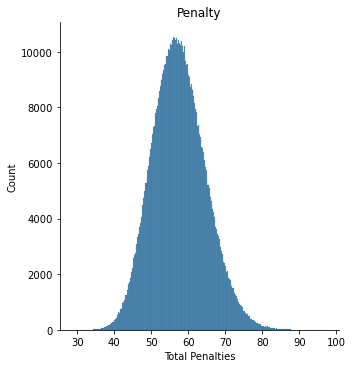

In [9]:
# Plot histogram of results dataframe
sns.displot(x = 'Total Penalties',
            data = results_df)

plt.title('Penalty')
plt.show()

<br><h2>Creating simulation with prioritization</h2>
<br>

In [15]:
# 4. Setting loops with prioritization

# Monte Carlo Simulation
num_simulations = 100000

# Prioritizing constraints
p1 = 3
p2 = 2


# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []
np.random.seed(42)

# Loop through many simulations
for i in range(num_simulations):

    # Generating a separate list to work with
    emp_index = list(range(0,100))
    teams = []
    
    # Looping to create random teams of 4
    for j in range(25):
        team = random.sample(emp_index, 4)
        for i in team:
            emp_index.remove(i)
        teams.append(team)
        
        
    # Calculate gender ratios of teams
    gender_dist = []
    gender_penalty = []
    for i in range(25):
        team_genders = []
        for k in teams[i]:
            team_genders.append(mm_data.loc[k,'Gender'])
        female_diff = abs(round(team_genders.count('Female')/4 - female_ratio,2))
        gender_penalty.append(female_diff)
        gender_dist.append(team_genders)

        
    # Calculating Nationality ratios of teams
    nation_dist = []
    nation_penalty = []
    for i in range(25):
        team_nation = []
        for k in teams[i]:
            team_nation.append(mm_data.loc[k,'Nationality'])
        nation_diff = set(team_nation)
        unique = 4 - len(nation_diff) 
        nation_penalty.append(unique)
        nation_dist.append(team_nation)
        
    # Calculating Department ratios of teams
    dept_dist = []
    dept_penalty = []
    for i in range(25):
        team_dept=[]
        for k in teams[i]:
            team_dept.append(mm_data.loc[k,'Department'] * p2)
        dept_diff = set(team_dept)
        dept_unique = 4 - len(dept_diff)
        dept_penalty.append(dept_unique)
        dept_dist.append(team_dept)

    # Calculating Experience ratios of teams
    exp_dist = []
    exp_penalty = []
    for i in range(25):
        team_exp = []
        for k in teams[i]:
            team_exp.append(mm_data.loc[k,'Experience'] * p1)
        exp_diff = abs(round(Average(team_exp) - 16.34,2))
        exp_penalty.append(exp_diff)
        exp_dist.append(team_exp) 
        
    #Calculating the Title Penalty ratios of teams
    title_dist = []
    title_penalty = []
    for i in range(25):
        team_title = []
        for k in teams[i]:
            team_title.append(mm_data.loc[k,'Title'])
        title_dist.append(team_title)

    # Creating the penalities
    if 'Junior' in team_title and 'Manager' in team_title :
        penalty = 0
        title_penalty.append(penalty)
        
    elif 'Junior' in team_title or 'Manager' in team_title :
        penalty = 1
        title_penalty.append(penalty)
        
    else:
        penalty = 2
        title_penalty.append(penalty)
    
    
    
    # Normalize    
    gender_normalized = []
    for i in gender_penalty:
            gender_norm = (i - mean(gender_penalty)) % (np.std(gender_penalty))
            gender_normalized.append(gender_norm)

    nat_normalized = []
    for i in nation_penalty:
            nat_norm = (i - mean(nation_penalty)) % (np.std(nation_penalty))
            nat_normalized.append(nat_norm)

    dept_normalized = []
    for i in dept_penalty:
            dept_norm = (i - mean(dept_penalty)) % (np.std(dept_penalty))
            dept_normalized.append(dept_norm)

    exp_normalized = []
    for i in exp_penalty:
            exp_norm = (i - mean(exp_penalty)) % (np.std(exp_penalty))
            exp_normalized.append(exp_norm)
    
    
    
    # Calculating penalty per team per simulation
    #penalty_per_team = female_diff + unique + dept_unique + exp_diff + penalty
            
    # Calculating penalty for each simulation
    g_penalty = sum(gender_normalized)
    n_penalty = sum(nat_normalized)
    d_penalty = sum(dept_normalized)
    e_penalty = sum(exp_normalized)
    t_penalty = sum(title_penalty)
    
    
    
    # Summing all the penalties
    total_penalties = g_penalty + n_penalty + d_penalty + e_penalty + t_penalty
    
    
    
    # Append the results of all simulations to one df
    all_stats.append([teams, g_penalty, n_penalty, d_penalty, e_penalty, t_penalty, total_penalties])

    
# Save results in the results dataframe
results_p_df = pd.DataFrame.from_records(all_stats, columns = ['Teams',
                                                             'Gender Penalty', 
                                                             'Nationality Penalty',
                                                             'Department Penalty',
                                                             'Experience Penalty',
                                                             'Title Penalty',
                                                             'Total Penalties'])



results_p_characters = pd.DataFrame({'Teams': teams,
                                   'Gender': gender_dist, 
                                   'Nationality': nation_dist,
                                   'Department': dept_dist, 
                                   'Experience': exp_dist,
                                   'Title': title_dist})#,
                                   #'Per Team': penalty_per_team})

<ipython-input-15-3cdfc7eb4d2d>:109: RuntimeWarning: invalid value encountered in double_scalars
  nat_norm = (i - mean(nation_penalty)) % (np.std(nation_penalty))
<ipython-input-15-3cdfc7eb4d2d>:114: RuntimeWarning: invalid value encountered in double_scalars
  dept_norm = (i - mean(dept_penalty)) % (np.std(dept_penalty))


<br><h2>Simulation with prioritization results</h2>
<br>

In [16]:
# Describing the output for the simulation
results_p_df.describe()

,Gender Penalty,Nationality Penalty,Department Penalty,Experience Penalty,Title Penalty,Total Penalties
count,100000.000000,95321.000000,99931.000000,100000.000000,100000.000000,95253.000000
mean,1.825775,4.932765,4.944562,183.057913,0.762050,195.506603
std,0.693033,0.991279,1.250038,30.692410,0.595729,30.735774
min,0.251269,2.449490,0.499600,71.922358,0.000000,87.404647
25%,1.399177,4.611984,4.198285,161.855515,0.000000,174.289199
50%,1.883715,4.765879,4.909745,181.950313,1.000000,194.419473
75%,2.414014,5.199385,5.552081,203.102025,1.000000,215.590230
max,3.751446,11.777945,12.852766,330.254016,2.000000,341.955116


In [17]:
# Top 5 team combinations with the lowest penalties
results_p_df.sort_values(by = 'Total Penalties', ascending = True).head(n = 5)

,Teams,Gender Penalty,Nationality Penalty,Department Penalty,Experience Penalty,Title Penalty,Total Penalties
73718,"[[55, 75, 76, 54], [64, 45, 74, 26], [51, 15, ...",2.153635,7.871569,4.457084,71.922358,1,87.404647
88226,"[[3, 56, 91, 80], [71, 68, 13, 44], [27, 48, 8...",1.450649,4.611984,5.623380,74.015697,2,87.701710
89075,"[[54, 2, 14, 13], [59, 40, 83, 68], [1, 7, 27,...",1.604565,5.552081,5.552081,77.337184,0,90.045910
42793,"[[74, 90, 78, 99], [35, 18, 53, 80], [85, 88, ...",1.277093,5.199385,4.000000,83.415193,1,94.891670
56686,"[[30, 98, 71, 84], [95, 45, 96, 18], [44, 3, 2...",2.508409,4.000000,3.394113,84.344209,1,95.246731


In [18]:
# Showing the information of the first team
results_p_characters[0:25]

,Teams,Gender,Nationality,Department,Experience,Title
0,"[9, 90, 94, 24]","[Male, Male, Male, Female]","[South Korea, Brazil, Austria, Philippines]","[RetailRetail, PayrollPayroll, Supply ChainSup...","[0.0, 39.0, 66.0, 21.0]","[Senior, Junior, Senior, Senior]"
1,"[91, 17, 41, 57]","[Male, Male, Female, Female]","[Belgium, Russia, Kuwait, India]","[RetailRetail, TrainingTraining, Customer Serv...","[60.0, 39.0, 99.0, 57.0]","[Senior, Senior, Manager, Junior]"
2,"[83, 1, 39, 51]","[Female, Male, Male, Male]","[Colombia, United Kingdom, Lithuania, Iran]","[AdvertisingAdvertising, BudgetingBudgeting, P...","[126.0, 96.0, 96.0, 45.0]","[Senior, Senior, Junior, Junior]"
3,"[55, 16, 34, 14]","[Female, Male, Male, Female]","[India, Russia, Mexico, Saudi Arabia]","[DevelopmentDevelopment, AuditingAuditing, Aud...","[93.0, 93.0, 15.0, 75.0]","[Senior, Manager, Senior, Senior]"
4,"[0, 65, 7, 92]","[Female, Female, Male, Male]","[Vietnam, Ghana, Sri Lanka, Belgium]","[TrainingTraining, Employee RelationsEmployee ...","[30.0, 30.0, 69.0, 12.0]","[Manager, Senior, Senior, Senior]"
5,"[56, 29, 10, 20]","[Male, Male, Female, Male]","[India, Panama, South Africa, Qatar]","[Employee RelationsEmployee Relations, Trainin...","[78.0, 3.0, 36.0, 57.0]","[Junior, Junior, Senior, Senior]"
6,"[82, 81, 37, 77]","[Female, Male, Male, Male]","[Costa Rica, Croatia, Luxembourg, Dominican Re...","[RecruitmentRecruitment, AuditingAuditing, Aud...","[66.0, 24.0, 60.0, 39.0]","[Manager, Senior, Senior, Senior]"
7,"[52, 11, 42, 88]","[Female, Male, Male, Female]","[India, Singapore, Kenya, Chile]","[AuditingAuditing, BenefitsBenefits, RetailRet...","[66.0, 60.0, 15.0, 21.0]","[Junior, Junior, Senior, Senior]"
8,"[21, 47, 8, 72]","[Male, Male, Male, Male]","[Qatar, Iraq, Spain, Ethiopia]","[Quality ControlQuality Control, DevelopmentDe...","[72.0, 69.0, 39.0, 27.0]","[Manager, Junior, Junior, Senior]"
9,"[3, 38, 71, 25]","[Female, Female, Male, Male]","[United Arab Emirates, Lithuania, Finland, Peru]","[Supply ChainSupply Chain, DevelopmentDevelopm...","[6.0, 99.0, 3.0, 36.0]","[Senior, Senior, Junior, Senior]"


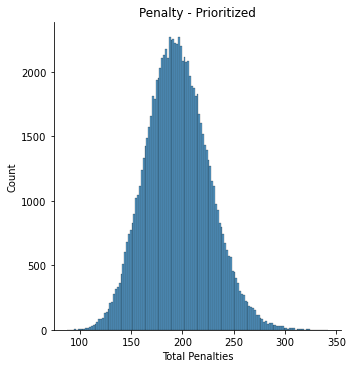

In [19]:
# Plot histogram of results dataframe
sns.displot(x = 'Total Penalties',
            data = results_p_df)

plt.title('Penalty - Prioritized')
plt.show()